In [2]:
'''Predict if patient will have diabetes on basis of various attributes

Pregnancies - No. of times the person was pregnant
Glucose - Glucose concentration level
BloodPressure - Diastolic Blood Pressure(mm Hg),measures the pressure in your arteries when your heart rests between beats.
Skin Thickness - Triceps Skin fold thickness(mm)
Insulin 2- Hour serum insulin, If your blood glucose level is still high 2 hours after you've eaten.
For those who don't have diabetes: less than 140 mg/dL
For those who have diabetes: less than 180 mg/dL
BMI Body mass index(weight) (weightin kg/(height in m)^2
DiabetesPedigree Function - Diabetes pedigree function (a function which scores likelihood of diabetes based on family history)
Age
Outcome : class variable (0 or 1)'''

"Predict if patient will have diabetes on basis of various attributes\n\nPregnancies - No. of times the person was pregnant\nGlucose - Glucose concentration level\nBloodPressure - Diastolic Blood Pressure(mm Hg),measures the pressure in your arteries when your heart rests between beats.\nSkin Thickness - Triceps Skin fold thickness(mm)\nInsulin 2- Hour serum insulin, If your blood glucose level is still high 2 hours after you've eaten.\nFor those who don't have diabetes: less than 140 mg/dL\nFor those who have diabetes: less than 180 mg/dL\nBMI Body mass index(weight) (weightin kg/(height in m)^2\nDiabetesPedigree Function - Diabetes pedigree function (a function which scores likelihood of diabetes based on family history)\nAge\nOutcome : class variable (0 or 1)"

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.impute import KNNImputer
import scipy.stats as stats
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score,roc_auc_score,accuracy_score,precision_score,recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

In [11]:
df = pd.read_csv("diabetes_sl.csv")

In [12]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
# By default top 5 rows will be displayed

In [14]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [15]:
# by default bottom 5rows will be displayed

In [16]:
df.dtypes # displays data types of the columns

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [17]:
df.columns #learning about the columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [18]:
df.shape

(768, 9)

In [19]:
# there are 768 rows and 9 columns in the dataset

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [21]:
# there are 768 non null values in data

In [22]:
# summary statistics of numerical column
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [23]:
# here we see that min value of glucose, BP, SkinThickness, Insulin, BMI is zero which is practically not possible
# Hence in data cleaning, we have to replace them with median/mean value depending on the distribution
# Also in the max column we can see insulin levels are 846, hence we have to treat outliers
# Mean of age is 33.24
# lower quartile Q1 for bmi is 27.30 and upper quartile is 36.60

In [24]:
df.isnull().sum() # checking for null values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [25]:
# There are no null values in data

In [26]:
df["BMI"]

0      33.6
1      26.6
2      23.3
3      28.1
4      43.1
       ... 
763    32.9
764    36.8
765    26.2
766    30.1
767    30.4
Name: BMI, Length: 768, dtype: float64

In [27]:
#checking for 0 values in 5 columns , Age and  DiabetesPedigreeFunction do not have have minimum value as 0 hence we need not replace any values
#number of pregnancies as 0 is possible as observed in df.describe
print(df[df['BloodPressure']==0].shape[0])
print(df[df['Glucose']==0].shape[0])
print(df[df['SkinThickness']==0].shape[0])
print(df[df['Insulin']==0].shape[0])
print(df[df['BMI']==0].shape[0])

35
5
227
374
11


In [28]:
# This shows the count of zero in our columns

In [29]:
BMI_mean = df.BMI.mean()
print("Mean of BMI is", BMI_mean)

Mean of BMI is 31.992578124999998


In [30]:
# this gives the mean of BMI and same is observed above in summary statistics

In [31]:
# To Calculate mean, median, and mode of a specific column, say age
mean_age = df["Age"].mean()
median_age = df["Age"].median()
mode_age = df["Age"].mode().values[0]

print("Mean of age:", mean_age)
print("Median of age:", median_age)
print("Mode of age:", mode_age)

Mean of age: 33.240885416666664
Median of age: 29.0
Mode of age: 22


In [32]:
# We can say that mean , median and mode of age is 33 , 29, 22

### Data Visualisation

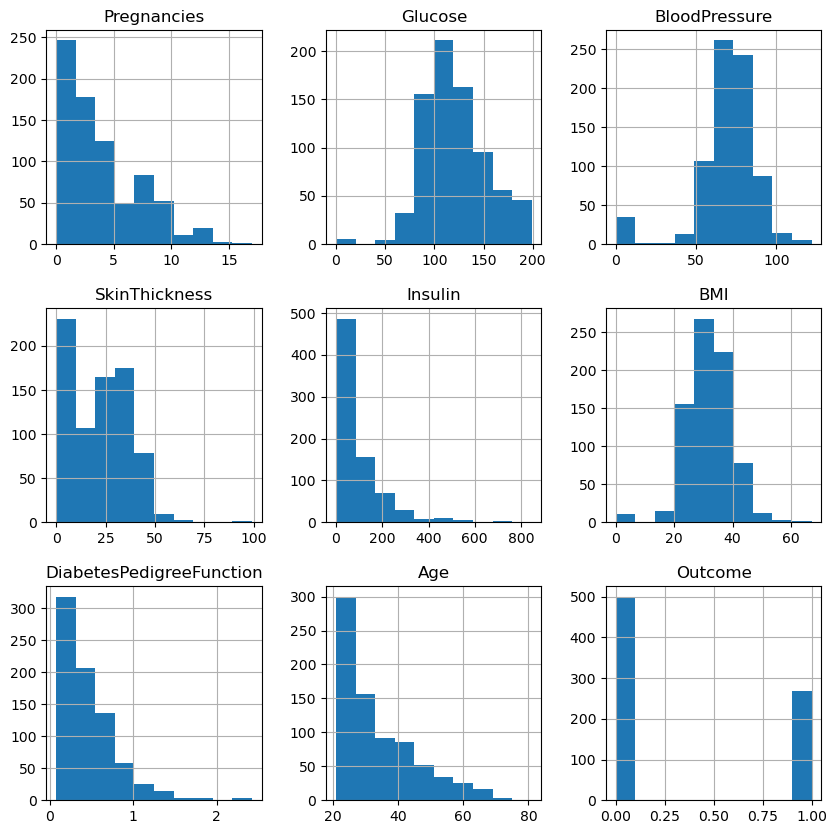

In [33]:
#histogram for each  feature
df.hist(bins=10,figsize=(10,10))
plt.show()


In [34]:
# We see that Glucose and Blood Pressure are normally distributed rest others are skewed and have outliers

<Axes: xlabel='DiabetesPedigreeFunction'>

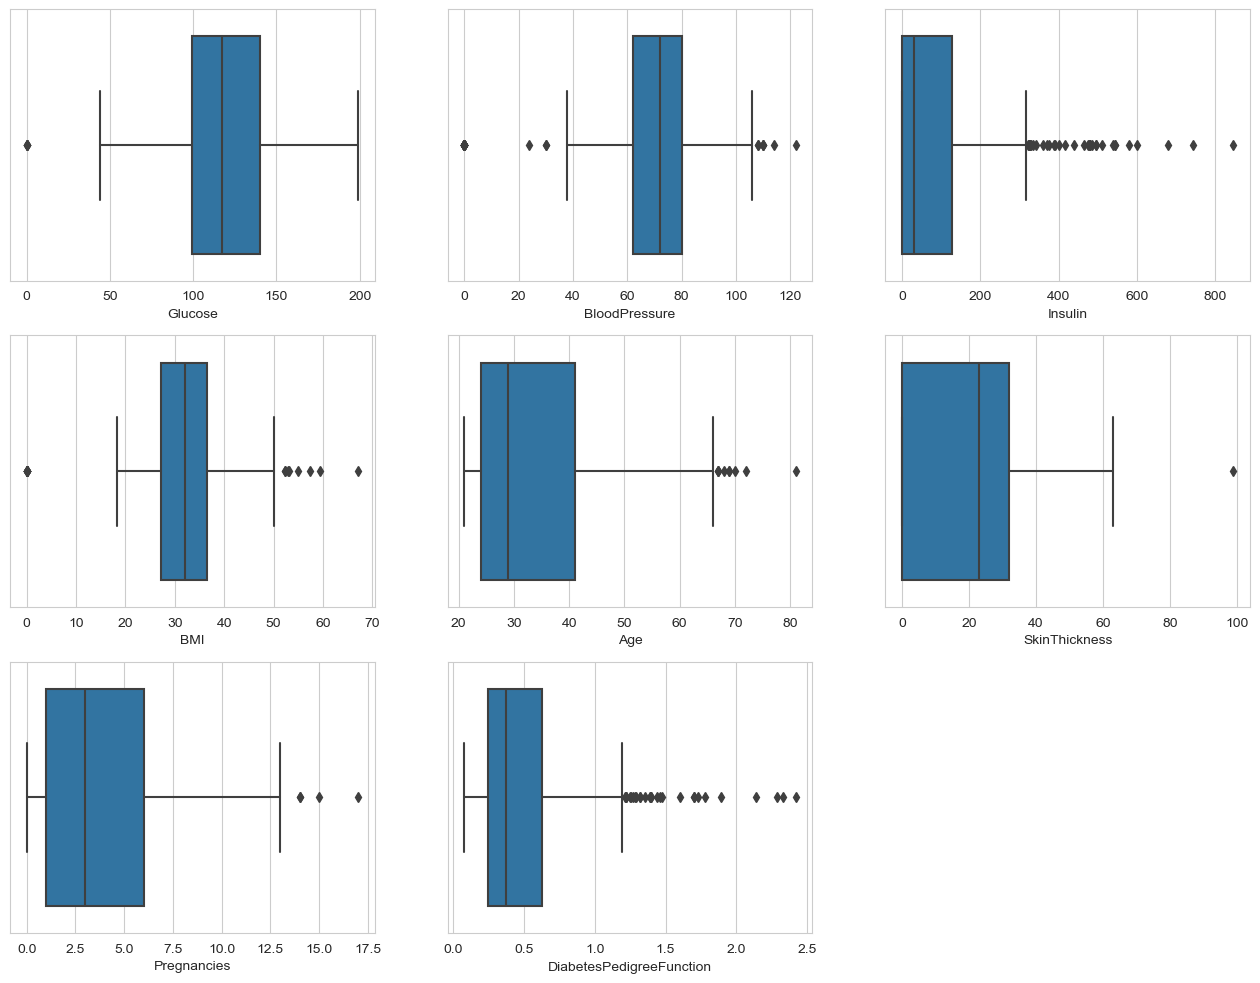

In [35]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x='Glucose',data=df)
plt.subplot(3,3,2)
sns.boxplot(x='BloodPressure',data=df)
plt.subplot(3,3,3)
sns.boxplot(x='Insulin',data=df)
plt.subplot(3,3,4)
sns.boxplot(x='BMI',data=df)
plt.subplot(3,3,5)
sns.boxplot(x='Age',data=df)
plt.subplot(3,3,6)
sns.boxplot(x='SkinThickness',data=df)
plt.subplot(3,3,7)
sns.boxplot(x='Pregnancies',data=df)
plt.subplot(3,3,8)
sns.boxplot(x='DiabetesPedigreeFunction',data=df)

In [36]:
# We see that there are outliers in Blood pressure, BMI, Age, Pregnancies
# There are alot of outliers in Insulin and DiabetesPedigreeFunction

<Axes: xlabel='Outcome', ylabel='count'>

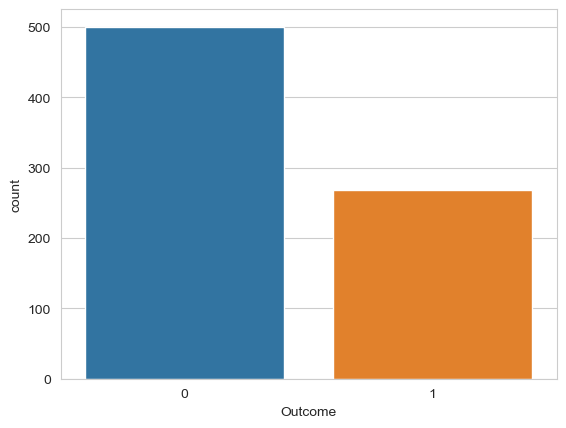

In [37]:
sns.countplot(x='Outcome', data=df)

In [38]:
# Here we see that the number of people having diabetes are less than that of people who doesn't ahve diabetes

### Data Preprocessing

In [39]:
df.shape

(768, 9)

In [40]:
#replacing 0 values with mean values if data is normally distributed and with median values if its a skewed distribution 
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())#normal distribution
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())#normal distribution
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].median())#skewed distribution
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].median())#skewed distribution
df['BMI']=df['BMI'].replace(0,df['BMI'].median())#skewed distribution

<Axes: >

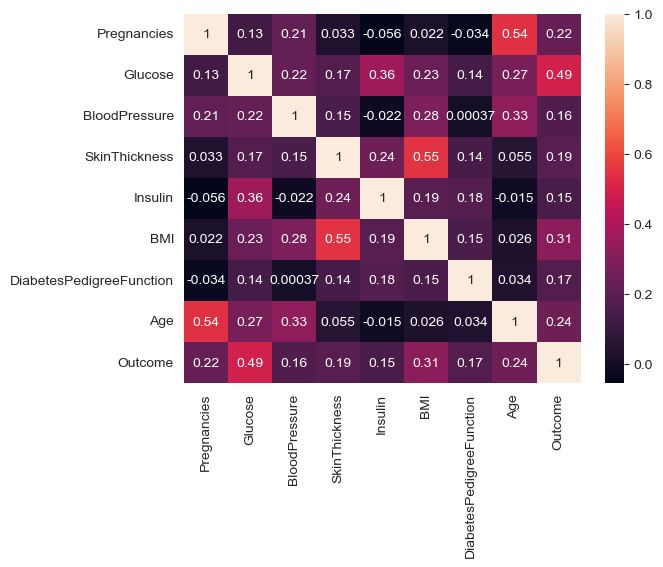

In [41]:
corrmat=df.corr()
sns.heatmap(corrmat, annot=True)

In [42]:
# We can observe that Glucose, BMI and Age are the most correlated with Outcome.
# BloodPressure, Insulin, DiabetesPedigreeFunction are the least correlated

In [43]:
# Treating Outliers

In [44]:
'''Outliers are unusual values in your dataset, and they can distort statistical analyses and violate their assumptions.
Hence it is of utmost importance to deal with them. In this case removing outliers can cause data loss
so we have to deal with it using various scaling and transformation techniques'''

'Outliers are unusual values in your dataset, and they can distort statistical analyses and violate their assumptions.\nHence it is of utmost importance to deal with them. In this case removing outliers can cause data loss\nso we have to deal with it using various scaling and transformation techniques'

In [45]:
# outlier filter

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [46]:
lower_bound

Pregnancies                  -6.500
Glucose                      39.000
BloodPressure                40.000
SkinThickness                 9.500
Insulin                    -114.625
BMI                          13.850
DiabetesPedigreeFunction     -0.330
Age                          -1.500
Outcome                      -1.500
dtype: float64

In [47]:
df = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

In [48]:
df.shape

(636, 9)

In [49]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [50]:
upper_bound

Pregnancies                  13.50000
Glucose                     189.00000
BloodPressure                99.00000
SkinThickness                43.00000
Insulin                     216.75000
BMI                          47.76250
DiabetesPedigreeFunction      1.09575
Age                          61.50000
Outcome                       2.50000
dtype: float64

In [51]:
df = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

In [52]:
df.shape

(568, 9)

<Axes: xlabel='DiabetesPedigreeFunction'>

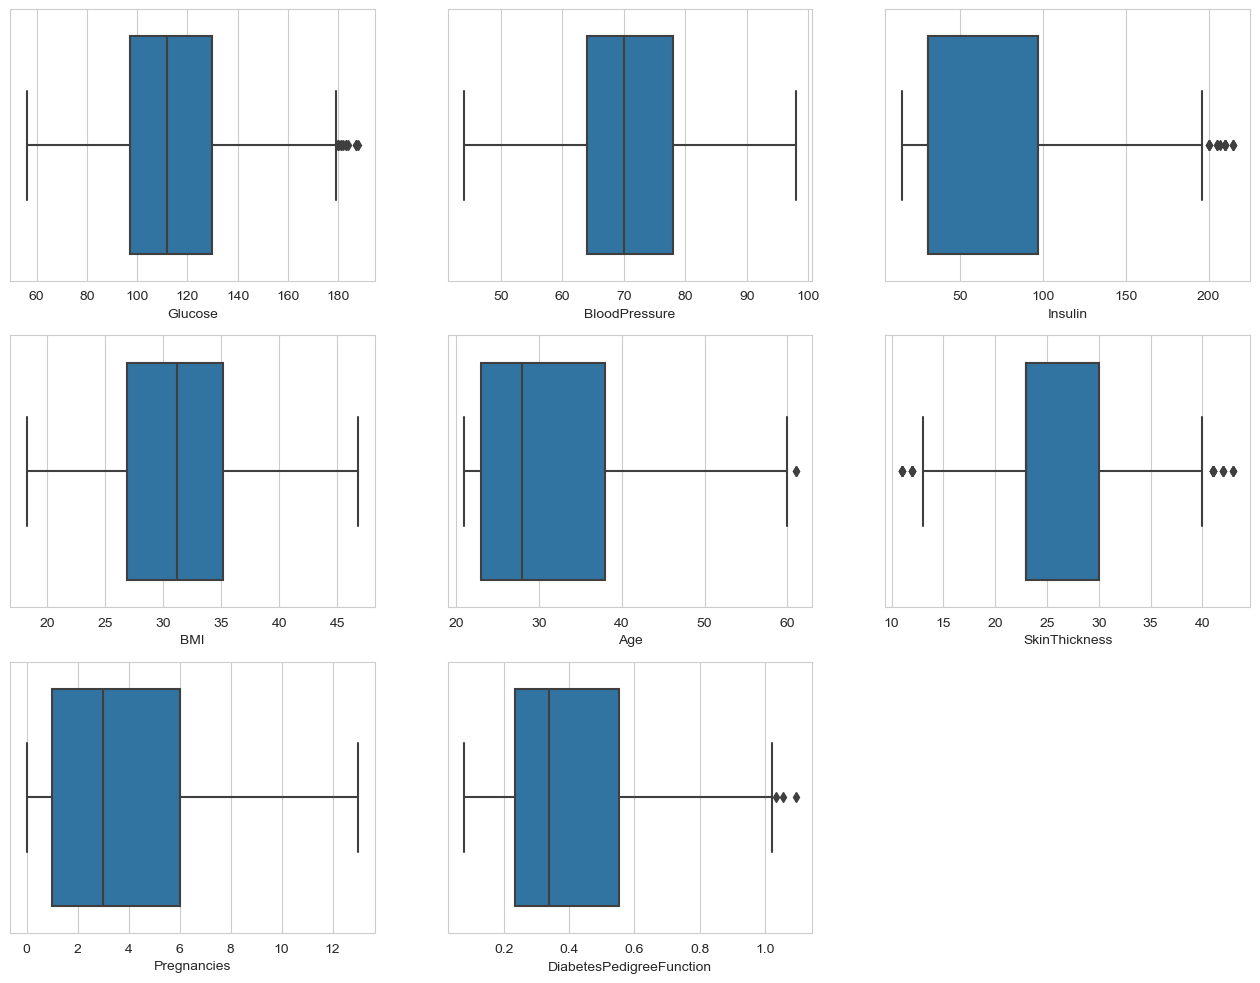

In [53]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x='Glucose',data=df)
plt.subplot(3,3,2)
sns.boxplot(x='BloodPressure',data=df)
plt.subplot(3,3,3)
sns.boxplot(x='Insulin',data=df)
plt.subplot(3,3,4)
sns.boxplot(x='BMI',data=df)
plt.subplot(3,3,5)
sns.boxplot(x='Age',data=df)
plt.subplot(3,3,6)
sns.boxplot(x='SkinThickness',data=df)
plt.subplot(3,3,7)
sns.boxplot(x='Pregnancies',data=df)
plt.subplot(3,3,8)
sns.boxplot(x='DiabetesPedigreeFunction',data=df)

In [54]:
# Outliers are removed to some extent

In [55]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [56]:
lower_bound

Pregnancies                 -6.50000
Glucose                     47.50000
BloodPressure               43.00000
SkinThickness               12.50000
Insulin                    -69.25000
BMI                         14.50000
DiabetesPedigreeFunction    -0.24075
Age                          0.50000
Outcome                     -1.50000
dtype: float64

In [57]:
df = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

In [58]:
upper_bound

Pregnancies                  13.50000
Glucose                     179.50000
BloodPressure                99.00000
SkinThickness                40.50000
Insulin                     196.75000
BMI                          47.50000
DiabetesPedigreeFunction      1.02725
Age                          60.50000
Outcome                       2.50000
dtype: float64

In [59]:
df = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

<Axes: xlabel='DiabetesPedigreeFunction'>

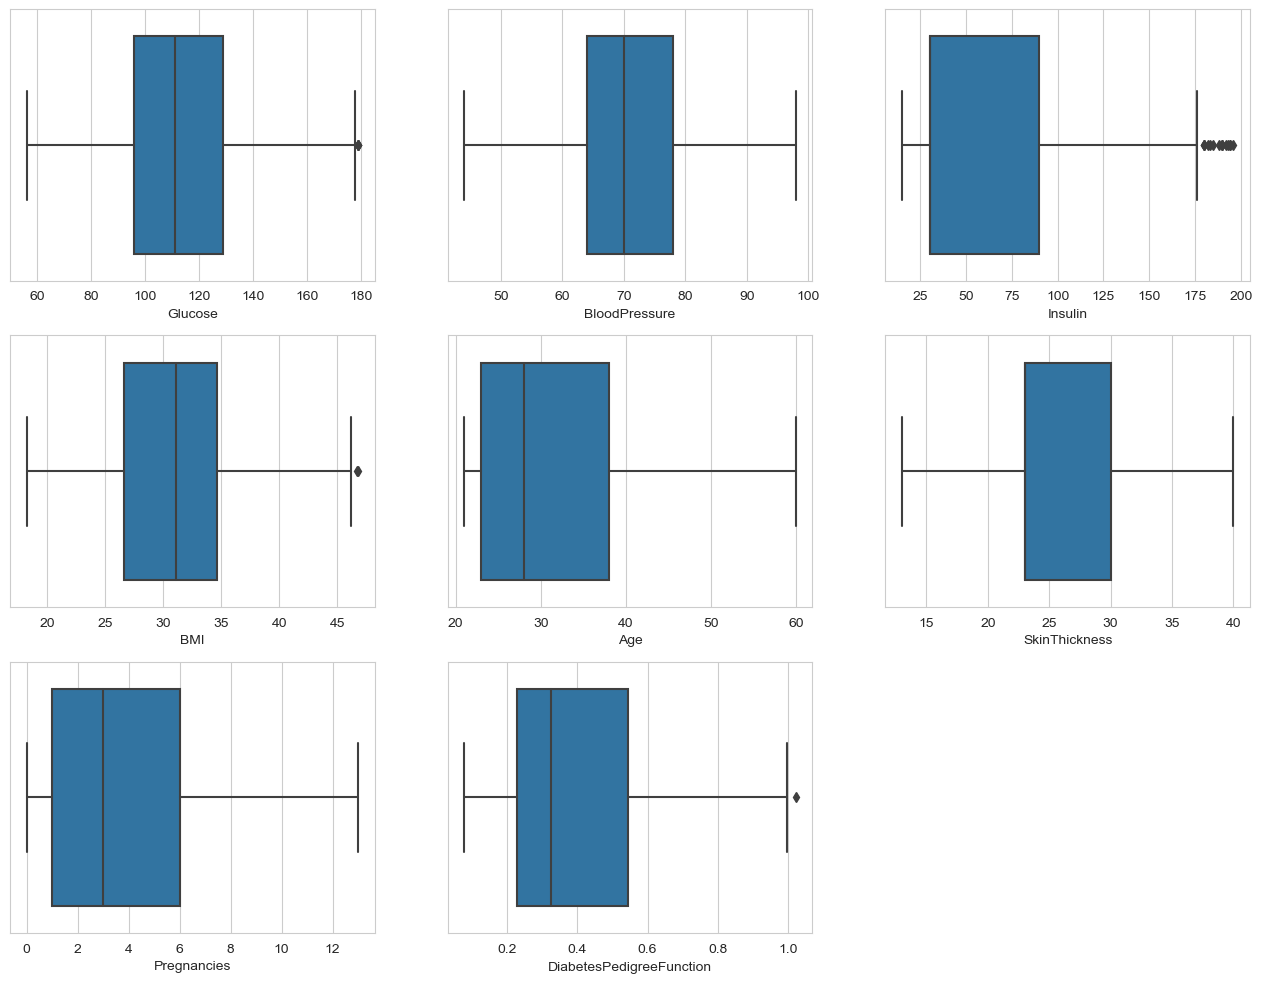

In [60]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x='Glucose',data=df)
plt.subplot(3,3,2)
sns.boxplot(x='BloodPressure',data=df)
plt.subplot(3,3,3)
sns.boxplot(x='Insulin',data=df)
plt.subplot(3,3,4)
sns.boxplot(x='BMI',data=df)
plt.subplot(3,3,5)
sns.boxplot(x='Age',data=df)
plt.subplot(3,3,6)
sns.boxplot(x='SkinThickness',data=df)
plt.subplot(3,3,7)
sns.boxplot(x='Pregnancies',data=df)
plt.subplot(3,3,8)
sns.boxplot(x='DiabetesPedigreeFunction',data=df)

In [61]:
# splitiing the dataframe in X and y
X = df.drop("Outcome", axis=1) #dropping the Outcome column and keeping all other columns as X
y = df.Outcome 


In [62]:
#  Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [63]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape) 
print(y_test.shape)

(410, 8)
(103, 8)
(410,)
(103,)


In [64]:
# Fitting the model 

In [65]:
from sklearn import svm
best_params = {'C': 10.0, 'kernel': 'linear'}
classifier = svm.SVC(kernel=best_params['kernel'], C=best_params['C'])

In [66]:
#training the support vector Machine Classifier
classifier.fit(X_train, y_train)

SVC(C=10.0, kernel='linear')

In [67]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

In [68]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7878048780487805


In [69]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)

In [70]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7961165048543689


- Making a Predictive System

In [71]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = classifier.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic


- Saving the trained model

In [72]:
import pickle

In [73]:
filename = 'trained_model.pkl'
pickle.dump(classifier, open(filename, 'wb'))

In [74]:
# loading the saved model
loaded_model = pickle.load(open('trained_model.pkl', 'rb'))

In [75]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic
